Topics Covered:
Classification
Nearest Neighbor
SVC
GridSearch CV

In [1]:
def getDataSet1():
    import pandas as pd

    df = pd.read_csv('ex2data1.txt',header=None)
    df.columns = ['test1','test2','pass']

    X = df[['test1','test2']]
    y = df['pass']
    
    return(X, y, df)


In [2]:
def getDataSet2():
    import pandas as pd

    df = pd.read_csv('ex2data2.txt',header=None)
    df.columns = ['test1','test2','pass']
    
    X = df[['test1','test2']]
    y = df['pass']
    return(X, y, df)

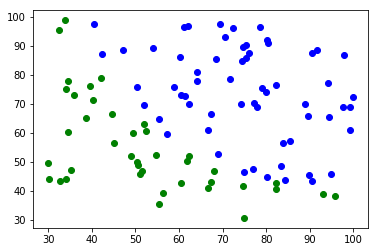

In [76]:
def plotData():
    import matplotlib.pyplot as plt
    
    (X,y,df) = getDataSet1()
    notPassed = df[df['pass'] == 0]
    passed = df[df['pass'] == 1]
    
    plt.plot(notPassed['test1'],notPassed['test2'],'go')
    plt.plot(passed['test1'],passed['test2'],'bo')
    plt.show()

plotData()
    

In [13]:
def plotSolution(df,predict):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.colors import ListedColormap
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    
    gridSize = (df['test1'].max() - df['test1'].min())/100
    
    x_min, x_max = df['test1'].min() - 3*gridSize, df['test1'].max() + 3*gridSize
    y_min, y_max = df['test2'].min() - 3*gridSize, df['test2'].max() + 3*gridSize
    xx, yy = np.meshgrid(np.arange(x_min, x_max, gridSize),np.arange(y_min, y_max, gridSize))
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    notPassed = df[df['pass'] == 0]
    passed = df[df['pass'] == 1]
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.plot(notPassed['test1'],notPassed['test2'],'go')
    plt.plot(passed['test1'],passed['test2'],'bo')
    plt.show()

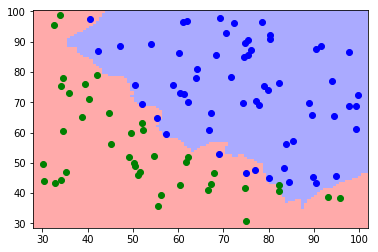

(0.94666666666666666, 0.92000000000000004)

In [92]:
# change the n_neighbors parameter between 1 and 4 for testset 1 and 2, notice the
# different graph and results
# how many nearest neighbors is best for data set 1, how about for dataset 2
def getKNearestNeighbor():
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    
    neighbors=3
    (X,y,df) = getDataSet1()
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    neigh = KNeighborsClassifier(n_neighbors = neighbors).fit(X_train,y_train)
    plotSolution1(df,neigh.predict)
    return (neigh.score(X_train, y_train),neigh.score(X_test, y_test))

getKNearestNeighbor()
    

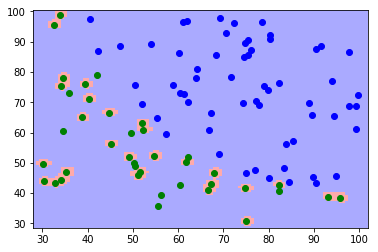

(1.0, 0.56000000000000005)

In [65]:
#run for set1 and set2, notice the difference
def getSVC():

    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC 
    
    (X,y,df) = getDataSet1()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    svc = SVC().fit(X_train,y_train)
    plotSolution1(df,svc.predict)
    return (svc.score(X_train, y_train),svc.score(X_test, y_test))

getSVC()

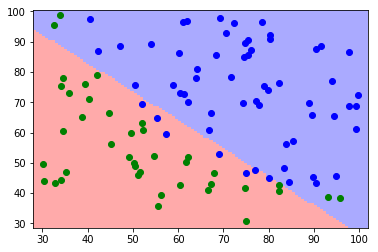

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


(0.90666666666666662, 0.88)

In [74]:
#run for set1 and set2, notice the difference
def getSVCGridSearch():

    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    
    (X,y,df) = getDataSet1()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    parameters = {'kernel':('linear', 'rbf'), 'C':[1,5,10,20,50]}
    clf = GridSearchCV(SVC(), parameters)
    clf.fit(X_train,y_train)
    svc = clf.best_estimator_.fit(X_train,y_train)
    plotSolution1(df,svc.predict)
    print(svc)
    return (svc.score(X_train, y_train),svc.score(X_test, y_test))

getSVCGridSearch()

In [91]:
# with your best nearest neighbor for dataset1 calculate the probability that 
# a student that gets 55 and 55, and 60 and 60 will pass, how about 65 and 65? 
# 70 and 70?
# SVC cannot give you probability, will only give you the prediction, so for the best SVC 
# tell me if that student is going to pass or not for the same grades above
def calculateProb():

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split
    
    predictArray = [[50,50],[55,55],[60,60],[65,65]]
    neighbors=3
    (X,y,df) = getDataSet1()
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    
    neigh = KNeighborsClassifier(n_neighbors = neighbors).fit(X_train,y_train)
    
    svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False).fit(X_train,y_train)
    print("Nearest Neighbor: \n", neigh.predict_proba(predictArray))
    print("SVC: \n", svc.predict(predictArray))
calculateProb()

Nearest Neighbor: 
 [[ 1.          0.        ]
 [ 0.66666667  0.33333333]
 [ 0.          1.        ]
 [ 0.          1.        ]]
SVC: 
 [0 0 0 1]
